In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Function to plot decision boundary
def plot_decision_boundary(clf, X, y, axes, title, alpha=0.5, contour = True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
#     y_pred = clf.predict(X.values)
#     print('Success')
    cmap1 = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    _ = plt.contourf(x1, x2, y_pred, cmap = cmap1, alpha=0.8)
    if contour:
        cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        _ = plt.contour(x1, x2, y_pred, cmap=cmap2)
    _ = plt.plot(X[:,0][y==0], X[:,1][y==0], 'yo', alpha=alpha)
    _ = plt.plot(X[:,0][y==1], X[:,1][y==1], 's', alpha=alpha)
    _ = plt.title(title)
    _ = plt.axis(axes)
    _ = plt.xlabel(r"$x_1$", fontsize=18)
    _ = plt.ylabel(r"$x_2$", fontsize=18, rotation = 0)

### Voting Classifiers
<p><b>A very simple way to create an even better classifier is to aggregate the predictions of
each classifier and predict the class that gets the most votes. There are two types of voting used to aggregate base predictions — hard voting and soft voting.</b></p>

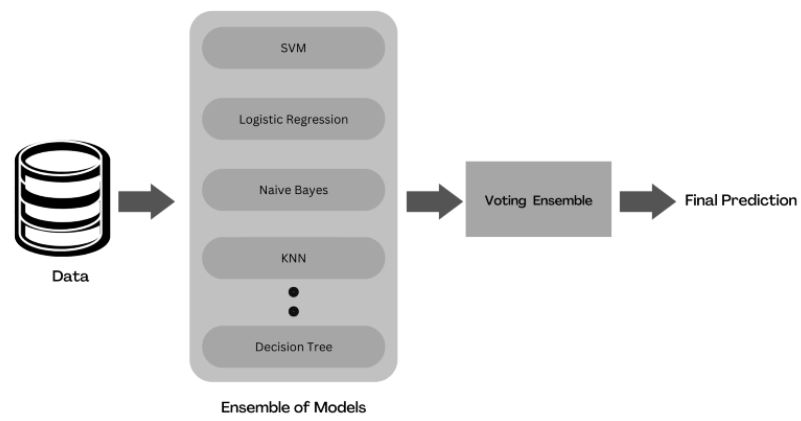

<p><b>Generate data using make_moons from SK-Learn</b></p>

In [3]:
from sklearn.datasets import make_moons

In [4]:
X, y = make_moons(n_samples=1000, noise=0.30, random_state=42)

### Hard Voting
<p><b>Hard Voting picks up the prediction with the highest number of votes as the final prediction.</b></p>

In [5]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [7]:
# Import SKLearn Classifiers
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingClassifier

In [8]:
log_reg = LogisticRegression()
svc = SVC()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
# sgd = SGDClassifier()

In [9]:
estimators1 = [('lr', log_reg),('svc', svc),('rf', rf),('dt',dt)]

In [10]:
voting_clf_hard = VotingClassifier(estimators= estimators1, voting='hard')

In [11]:
%%time
voting_clf_hard.fit(X_train, y_train)

CPU times: user 93.8 ms, sys: 0 ns, total: 93.8 ms
Wall time: 120 ms


VotingClassifier(estimators=[('lr', LogisticRegression()), ('svc', SVC()),
                             ('rf', RandomForestClassifier()),
                             ('dt', DecisionTreeClassifier())])

In [12]:
# Take a look at each Classifier's accuracy
from sklearn.metrics import accuracy_score

In [13]:
%%time
for clf in (log_reg, svc, rf, dt, voting_clf_hard):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,':', accuracy_score(y_test, y_pred))

LogisticRegression : 0.85
SVC : 0.92
RandomForestClassifier : 0.93
DecisionTreeClassifier : 0.9
VotingClassifier : 0.915
CPU times: user 266 ms, sys: 31.2 ms, total: 297 ms
Wall time: 287 ms


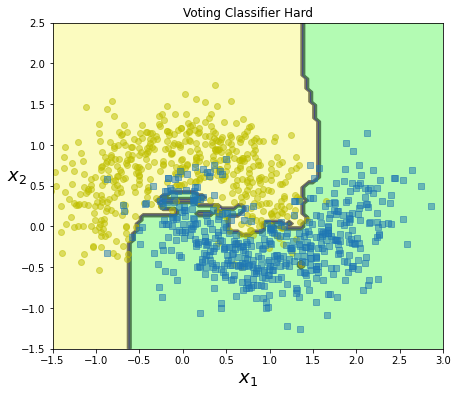

In [14]:
plt.figure(figsize=(7,6))
plot_decision_boundary(voting_clf_hard, X, y, [-1.5,3,-1.5,2.5], "Voting Classifier Hard")

### Soft Voting
<p><b>Combines the probability of each class in each model and picks the class with the highest probability as the final prediction. And, ensure that all classifiers can estimate class probabilities.</b></p>
<p><b>For the SVC class by default, we need to set its probability hyperparameter
to True (this will make the SVC class use cross-validation to estimate class
    probabilities, slowing down training, and it will add a predict_proba() method).</b></p>

In [15]:
svc_ = SVC(probability=True)
# sgd_ = SGDClassifier(loss='log_loss')

In [16]:
estimators2 = [('lr', log_reg),('svc', svc_),('rf', rf), ('dt',dt)]

In [17]:
voting_clf_soft = VotingClassifier(estimators= estimators2, voting='soft')

In [18]:
%%time
voting_clf_soft.fit(X_train, y_train)

CPU times: user 125 ms, sys: 0 ns, total: 125 ms
Wall time: 129 ms


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('svc', SVC(probability=True)),
                             ('rf', RandomForestClassifier()),
                             ('dt', DecisionTreeClassifier())],
                 voting='soft')

In [19]:
# Take a look at each Classifier's accuracy

In [20]:
%%time
for clf in (log_reg, svc_, rf, dt, voting_clf_soft):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,':', accuracy_score(y_test, y_pred))

LogisticRegression : 0.85
SVC : 0.92
RandomForestClassifier : 0.93
DecisionTreeClassifier : 0.905
VotingClassifier : 0.915
CPU times: user 250 ms, sys: 15.6 ms, total: 266 ms
Wall time: 278 ms


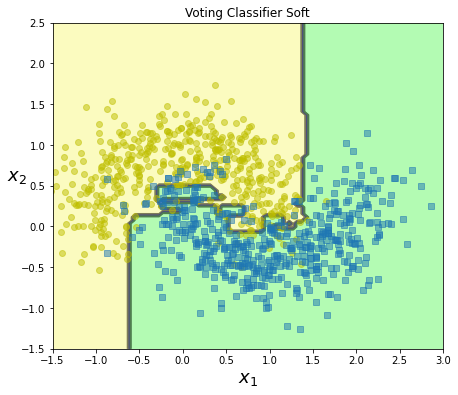

In [21]:
plt.figure(figsize=(7,6))
plot_decision_boundary(voting_clf_soft, X, y, [-1.5,3,-1.5,2.5], "Voting Classifier Soft",)

### Hard Voting Vs Soft Voting

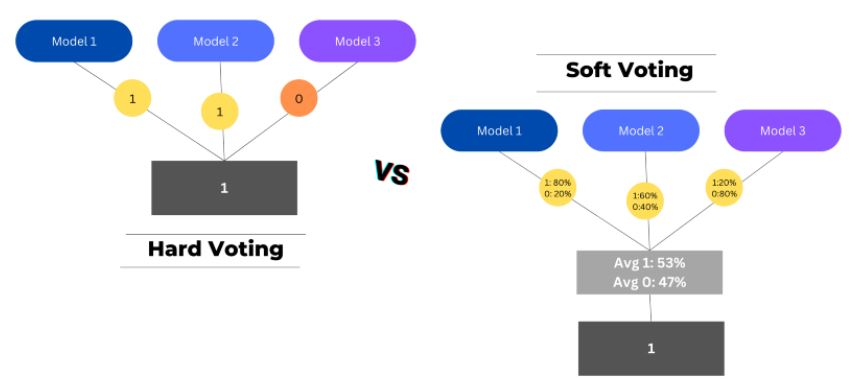

### Bagging and Pasting
<p><b>Another approach is to use the same training algorithm for every predictor and train them on different random subsets of the training set. When sampling is performed with replacement, this method is called <i><u>bagging</u></i>. When sampling is performed without replacement, it is called <i><u>pasting</u></i>.</b></p>
<p><b>Once all predictors are trained, the ensemble can make a prediction for a new
instance by simply aggregating the predictions of all predictors. The aggregation
function is typically the statistical mode (i.e., the most frequent prediction, just like a
    hard voting classifier) for classification, or the average for regression.</b></p>
    
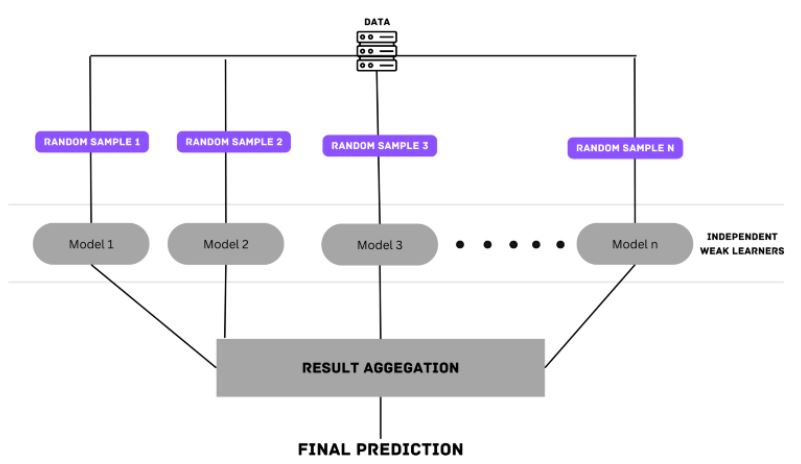

### Bagging and Pasting SKLearn
<p><b>Scikit-Learn offers a simple API for both bagging and pasting with the BaggingClas
    sifier class (or BaggingRegressor for regression).</b></p>

In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [23]:
# n_estimators = number of estimators in the ensemble
# max_samples = number of training instances
# bootstrap = True for Bagging and False for Pasting
# n_jobs = Number of CPU cores to use for training and predictions
bag_clf_bag = BaggingClassifier(DecisionTreeClassifier(),n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1) # with Replacement
bag_clf_wt_bag = BaggingClassifier(DecisionTreeClassifier(),n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1) # without Replacement

In [24]:
%%time
bag_clf_bag.fit(X_train, y_train)

CPU times: user 15.6 ms, sys: 562 ms, total: 578 ms
Wall time: 1.93 s


BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [25]:
%%time
bag_clf_wt_bag.fit(X_train, y_train)

CPU times: user 31.2 ms, sys: 0 ns, total: 31.2 ms
Wall time: 109 ms


BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False,
                  max_samples=100, n_estimators=500, n_jobs=-1)

In [26]:
y_pred_bag = bag_clf_bag.predict(X_test)

In [27]:
accuracy_score(y_test, y_pred_bag) # with Replacement

0.92

In [28]:
y_pred_wt_bag = bag_clf_wt_bag.predict(X_test)

In [29]:
accuracy_score(y_test, y_pred_wt_bag)  # without Replacement

0.92

In [30]:
# from sklearn.model_selection import cross_val_score

In [31]:
# scores = cross_val_score(bag_clf_bag, X_train, y_train, cv=50) # CV with Bagging

In [32]:
# scores.mean(), scores.std()

In [33]:
# scores_ = cross_val_score(bag_clf_wt_bag, X_train, y_train, cv=50) # CV without Bagging

In [34]:
# scores_.mean(), scores_.std()

In [35]:
# Let's instantiate DecisionTreeClassifier

In [36]:
%%time
tree_clf = DecisionTreeClassifier(max_leaf_nodes=16, random_state=42)
tree_clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.49 ms


DecisionTreeClassifier(max_leaf_nodes=16, random_state=42)

In [37]:
y_pred = tree_clf.predict(X_test)
accuracy_score(y_pred, y_test)

0.915

<p><b>Decision Tree Versus Bagging Classifier</b></p>

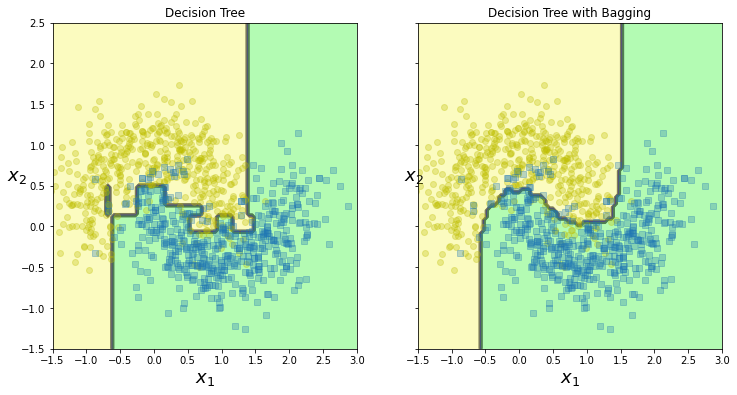

In [38]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6), sharey=True)
_ = plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y,[-1.5,3,-1.5,2.5], 'Decision Tree',0.3)
_ = plt.sca(axes[1])
plot_decision_boundary(bag_clf_bag, X, y, [-1.5,3,-1.5,2.5], 'Decision Tree with Bagging',0.3)

### Out-of-Bag Evaluation
<p><b>With bagging, some instances may be sampled several times for any given predictor,
while others may not be sampled at all. By default a BaggingClassifier samples m
training instances with replacement (bootstrap=True), where m is the size of the
    training set. <i><u>As m grows, this ratio approaches 1 – exp(–1) ≈ 63.212%</u><i>. This means that only about 63% of the training instances are sampled on
average for each predictor.6 The remaining 37% of the training instances that are not
sampled are called out-of-bag (oob) instances. Note that they are not the same 37% for all predictors.</b></p>

In [39]:
bag_clf_oob = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                               n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True)

In [40]:
bag_clf_oob.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, oob_score=True)

In [41]:
bag_clf_oob.oob_score_

0.9

In [42]:
y_pred_oob = bag_clf_oob.predict(X_test)

In [43]:
print(accuracy_score(y_test, y_pred_oob))

0.92


In [44]:
bag_clf_oob.oob_score_

0.9

In [45]:
bag_clf_oob.oob_decision_function_

array([[0.17701149, 0.82298851],
       [0.89449541, 0.10550459],
       [0.87556561, 0.12443439],
       ...,
       [0.03752759, 0.96247241],
       [0.80272109, 0.19727891],
       [0.59009009, 0.40990991]])

### Random Forests
<p><b>It is an ensemble of Decision Trees, generally trained via the bagging method (or sometimes pasting), typically with max_samples set to the size of the training set.</b></p>

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)

In [48]:
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [49]:
y_pred = rnd_clf.predict(X_test)

In [50]:
accuracy_score(y_pred, y_test)

0.93

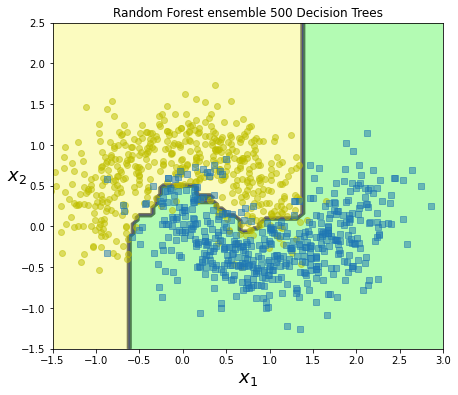

In [51]:
# Visualise RandomForestClassifier
_ = plt.figure(figsize=(7,6))
plot_decision_boundary(rnd_clf, X, y, [-1.5,3,-1.5,2.5], 'Random Forest ensemble 500 Decision Trees')

<p><b>A Random Forest is equivalent to a bag of decision trees:</b></p>

In [52]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_features="sqrt", max_leaf_nodes=16),
    n_estimators=500, random_state=42)

In [53]:
bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)

In [54]:
np.sum(y_pred_bag == y_pred) / len(y_pred_bag)  # very similar predictions

0.995

### Feature Importance
<p><b>Random Forests is that they make it easy to measure the relative importance of each feature. Scikit-Learn measures a feature’s importance by looking at how much the tree nodes that use that feature reduce impurity on average (across all trees in the forest). More precisely, it is a weighted average, where each node’s weight is equal to the number of training samples that are associated with it.</b></p>
<p><b><u>Random Forests are very handy to get a quick understanding of what features actually matter, in particular if you need to perform feature selection.</u></b></p>

In [55]:
from sklearn.datasets import load_iris

In [56]:
iris = load_iris()

In [57]:
rnd_clf_ = RandomForestClassifier(n_estimators=500, n_jobs=-1)

In [58]:
rnd_clf_.fit(iris['data'], iris['target'])

RandomForestClassifier(n_estimators=500, n_jobs=-1)

In [59]:
for feature, score in zip(iris['feature_names'], rnd_clf_.feature_importances_):
    print(feature,':',score)

sepal length (cm) : 0.0861639121264945
sepal width (cm) : 0.023086881912041272
petal length (cm) : 0.43957252161157506
petal width (cm) : 0.45117668434988933


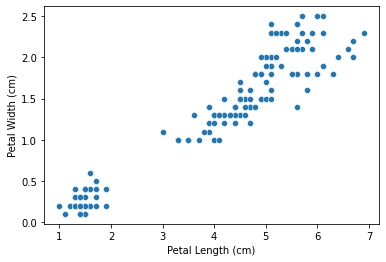

In [60]:
sns.scatterplot(data = iris['data'], x = iris['data'][:,2], y = iris['data'][:,3])
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

In [61]:
from sklearn.datasets import fetch_california_housing

In [62]:
housing = fetch_california_housing()

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
rnd_reg = RandomForestRegressor(n_estimators=500, n_jobs=-1, )

In [65]:
rnd_reg.fit(housing['data'], housing['target'])

RandomForestRegressor(n_estimators=500, n_jobs=-1)

In [66]:
for feature, score in zip(housing['feature_names'], rnd_reg.feature_importances_):
    print(feature,':',np.round(score*100,2),'%')

MedInc : 52.01 %
HouseAge : 5.29 %
AveRooms : 4.49 %
AveBedrms : 2.91 %
Population : 3.14 %
AveOccup : 13.64 %
Latitude : 9.32 %
Longitude : 9.21 %


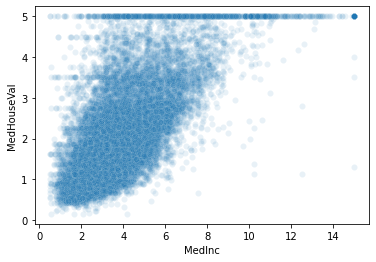

In [67]:
sns.scatterplot(data = housing['data'], x = housing['data'][:,0], y = housing['target'], alpha=0.1)
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.show()

In [68]:
# Implement RandomForestClassifier on a Glass Dataset and predict Type of Glass

In [69]:
glass_df = pd.read_csv('./Datasets/glass_data.csv')

In [70]:
glass_df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [71]:
# RI - Refractive Index (Optical Property)
# Chemical Elements (Na, Mg, etc.)
# Type of glass: (class attribute)
# 1 buildingwindowsfloatprocessed 
# 2 buildingwindowsnonfloatprocessed
# 3 vehiclewindowsfloatprocessed
# 4 vehiclewindowsnonfloatprocessed (none in this database)
# 5 containers
# 6 tableware
# 7 headlamps

In [72]:
glass_df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [74]:
glass_df.drop(['Id'], axis=1, inplace=True)

In [75]:
X = glass_df.iloc[:,:-1]
y = glass_df.iloc[:,-1]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [77]:
glass_rnd_clf = RandomForestClassifier(random_state=24)

In [78]:
glass_rnd_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=24)

In [79]:
glass_rnd_clf.predict([X_train.iloc[101]])

array([2])

In [80]:
# Test the performance of our model

In [81]:
y_pred_glass = glass_rnd_clf.predict(X_test)

In [82]:
from sklearn.metrics import ConfusionMatrixDisplay

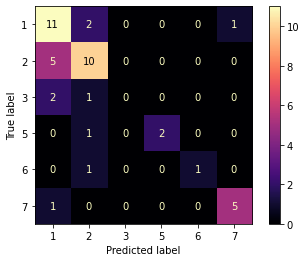

In [83]:
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_pred_glass, 
    labels=glass_rnd_clf.classes_,
    cmap='magma',
);

In [84]:
print(classification_report(y_test, y_pred_glass))

              precision    recall  f1-score   support

           1       0.58      0.79      0.67        14
           2       0.67      0.67      0.67        15
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       1.00      0.50      0.67         2
           7       0.83      0.83      0.83         6

    accuracy                           0.67        43
   macro avg       0.68      0.58      0.61        43
weighted avg       0.65      0.67      0.65        43



### Boosting
<p><b>The general idea of most
    boosting methods is to train predictors sequentially, each trying to correct its predecessor.</b></p>

### AdaBoost
<p><b>One way for a new predictor to correct its predecessor is to pay a bit more attention
to the training instances that the predecessor underfitted. This results in new predictors
focusing more and more on the hard cases. This is the technique used by
    AdaBoost.</b></p>

In [85]:
from sklearn.ensemble import AdaBoostClassifier

In [86]:
X_moons, y_moons = make_moons(n_samples=1000, noise=0.30, random_state=42)

In [87]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), 
    n_estimators=200,
    algorithm="SAMME.R", 
    learning_rate=0.5, 
    random_state=42
)

In [88]:
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons,
    y_moons,
    test_size=0.2,
    random_state=42
)

In [89]:
ada_clf.fit(X_moon_train, y_moon_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

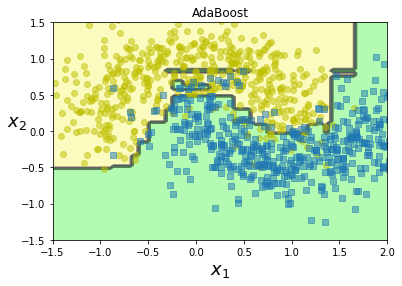

In [90]:
plot_decision_boundary(ada_clf, X_moons, y_moons, [-1.5,2,-1.5,1.5], 'AdaBoost')

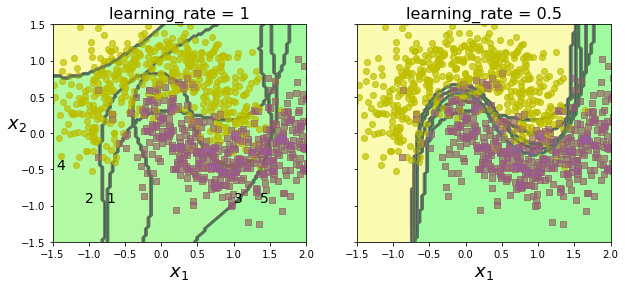

In [91]:
m = len(X_moon_train)

fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
for subplot, learning_rate in ((0, 1), (1, 0.5)):
    sample_weights = np.ones(m) / m
    plt.sca(axes[subplot])
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.2, gamma=0.6, random_state=42)
        svm_clf.fit(X_moon_train, y_moon_train, sample_weight=sample_weights * m)
        y_pred = svm_clf.predict(X_moon_train)

        r = sample_weights[y_pred != y_moon_train].sum() / sample_weights.sum() # Total Error
        alpha = learning_rate * np.log((1 - r) / r) # Performance of predictor
        sample_weights[y_pred != y_moon_train] *= np.exp(alpha) # Update weights
        sample_weights /= sample_weights.sum() # normalization step

        plot_decision_boundary(svm_clf, X_moons, y_moons,[-1.5,2,-1.5,1.5], 'Decision Boundaries', alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
    if subplot == 0:
        plt.text(-0.75, -0.95, "1", fontsize=14)
        plt.text(-1.05, -0.95, "2", fontsize=14)
        plt.text(1.0, -0.95, "3", fontsize=14)
        plt.text(-1.45, -0.5, "4", fontsize=14)
        plt.text(1.36,  -0.95, "5", fontsize=14)
    else:
        plt.ylabel("")
plt.show()

### Gradient Boosting
<p><b>Just like AdaBoost,
Gradient Boosting works by sequentially adding predictors to an ensemble, each one
correcting its predecessor. However, instead of tweaking the instance weights at every
iteration like AdaBoost does, this method tries to fit the new predictor to the residual
    errors made by the previous predictor.</b></p>

In [92]:
# Let create a quadratic dataset
np.random.seed(42)
X_gb = np.random.rand(100, 1) - 0.5
y_gb = 3*X_gb[:, 0]**2 + 0.05 * np.random.randn(100)

In [93]:
from sklearn.ensemble import GradientBoostingRegressor

In [94]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)

In [95]:
gbrt.fit(X_gb, y_gb)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

In [96]:
gbrt.predict(np.array([[0.8]]))

array([0.75026781])

In [97]:
gbrt.score(X_gb, y_gb)

0.9095502641012175